In [1]:
import os
import pandas as pd
import re
from wordcloud import WordCloud

In [2]:
files = os.listdir(".\\Documents")

In [3]:
files

['01 - Kraków.txt',
 '02 - Warszawa.txt',
 '03 - Wrocław.txt',
 '04 - 71 lat i koniec! Kylian Mbappe przeszedł do historii! Oto nowy rekord.txt',
 '05 - Barcelona już świętowała mistrzostwo! Wtedy nadeszła 95. minuta meczu Realu.txt',
 '06 - Epidemiologia otyłości na świecie i w Polsce.txt',
 '07 - Trendy w występowaniu nadwagi w Polsce.txt']

In [4]:
corpus = pd.DataFrame(columns=['document'])

for file in files:
    with open(".\\Documents\\" + file,mode="rt", encoding="utf-8") as f:
        txt = f.read()
    #print("==================")
    #print(txt)
    row = pd.DataFrame([{'document':txt}])
    corpus = pd.concat([corpus,row],ignore_index = True)

In [5]:
import spacy

In [6]:
import pl_core_news_md

In [7]:
# konieczne wykonanie w oknie terminala: python -m spacy download en_core_web_md  

nlp = pl_core_news_md.load()

In [8]:
tokens = []
removal = ['ADV', 'PRON', 'CCONJ', 'PUNCT', 'PART', 'DET', 'ADP', 'SPACE', 'NUM', 'SYM']

for txt in nlp.pipe(corpus['document']):
   # Process using Polish language model
   proj_tok = [token.lemma_.lower() for token in txt 
               if token.pos_ not in removal 
               and not token.is_stop 
               and token.is_alpha]
   tokens.append(proj_tok)

In [9]:
tokens

[['kraków',
  'krzysztof',
  'ukrainiec',
  'mieszkać',
  'polska',
  'lubić',
  'odwiedzać',
  'polski',
  'miasto',
  'poznawać',
  'historia',
  'kultura',
  'kraj',
  'oglądać',
  'zabytek',
  'kolejny',
  'weekend',
  'kolejny',
  'wyprawa',
  'raz',
  'kraków',
  'pociąg',
  'krzysztof',
  'zdecydować',
  'podróż',
  'samochód',
  'polski',
  'przyjaciółka',
  'ania',
  'znać',
  'planować',
  'ania',
  'spontaniczny',
  'osoba',
  'zmieniać',
  'zdanie',
  'krzysztof',
  'chcieć by',
  'zobaczyć',
  'zabytek',
  'ania',
  'wolałaby',
  'iść',
  'koncert',
  'filharmonia',
  'wyjść',
  'plan',
  'raz',
  'przyjazd',
  'udać',
  'uniknąć',
  'kork',
  'zobaczyć',
  'rynek',
  'główny',
  'ulubiony',
  'miejsce',
  'turysta',
  'kraków',
  'atmosfera',
  'szczególny',
  'zasługa',
  'okoliczny',
  'zabytek',
  'sukiennica',
  'kościół',
  'mariacki',
  'wieża',
  'ratuszowy',
  'kościół',
  'święty',
  'wojciech',
  'przepiękny',
  'stary',
  'kamienica',
  'kolejny',
  'etap',
  '

In [10]:
import gensim

In [11]:
id2word = gensim.corpora.Dictionary(tokens)

In [12]:
dtm = [id2word.doc2bow(doc) for doc in tokens]

In [19]:
num_topics = 4
lda_model = gensim.models.LdaMulticore(corpus = dtm, id2word=id2word, num_topics=num_topics,passes=250,random_state=100)

In [20]:
lda_model.print_topics()

[(0,
  '0.011*"real" + 0.008*"wrocław" + 0.008*"warszawa" + 0.008*"krzysztof" + 0.007*"pierwszy" + 0.006*"mallorca" + 0.006*"barcelona" + 0.005*"minuta" + 0.005*"dzień" + 0.005*"madryt"'),
 (1,
  '0.046*"otyłość" + 0.015*"rok" + 0.014*"występować" + 0.013*"nadwaga" + 0.012*"osoba" + 0.012*"wynosić" + 0.011*"mężczyzna" + 0.011*"kobieta" + 0.010*"polska" + 0.009*"częstość"'),
 (2,
  '0.026*"otyłość" + 0.020*"osoba" + 0.019*"występować" + 0.016*"otyły" + 0.015*"rok" + 0.012*"mężczyzna" + 0.012*"kobieta" + 0.010*"kraj" + 0.010*"stanowić" + 0.010*"badanie"'),
 (3,
  '0.011*"zabytek" + 0.009*"stary" + 0.009*"udać" + 0.009*"polski" + 0.009*"kolejny" + 0.009*"krzysztof" + 0.009*"ania" + 0.009*"kraków" + 0.007*"zobaczyć" + 0.007*"kościół"')]

In [21]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, dtm, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.103646 -0.083962       1        1  34.759649
0     -0.156123 -0.033178       2        1  29.229139
1      0.130613  0.060720       3        1  28.375589
3     -0.078136  0.056420       4        1   7.635623, topic_info=            Term       Freq      Total Category  logprob  loglift
797      otyłość  54.000000  54.000000  Default  30.0000  30.0000
894   występować  26.000000  26.000000  Default  29.0000  29.0000
1130     wynosić   9.000000   9.000000  Default  28.0000  28.0000
60         osoba  26.000000  26.000000  Default  27.0000  27.0000
36     krzysztof   7.000000   7.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
38     królewski   0.493377   3.954839   Topic4  -5.9416   0.4909
5          bilet   0.493369   1.747650   Topic4  -5.9417   1.3076
7        budynek   0.493369   1.747650   Topic4  -5.9417   1.3076
39       kultura   0.493369   1.747650   Topic4  -5.9417   1.3076
61       pewność   0.493369   1.747650   Topic4  -5.9417   1.3076

[246 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
665       1  0.936664    analiza
1         4  0.901212       ania
485       2  0.968215       arda
486       2  0.968215       atak
3         4  0.699344     august
...     ...       ...        ...
1152      3  0.723554    świecie
228       2  0.719883  świątynia
663       1  0.202770      życie
663       2  0.202770      życie
663       3  0.608310      życie

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

Topics found by LDA:
Topic #0: 0.020*"wrocław" + 0.010*"krzysztof" + 0.010*"miejsce" + 0.008*"święty" + 0.008*"wiek" + 0.008*"krasnala" + 0.008*"tumski" + 0.008*"most" + 0.005*"wyspa" + 0.005*"dzielnica"
Topic #1: 0.039*"otyłość" + 0.019*"występować" + 0.019*"osoba" + 0.016*"rok" + 0.013*"mężczyzna" + 0.013*"kobieta" + 0.013*"otyły" + 0.011*"kraj" + 0.011*"polska" + 0.011*"częstość"
Topic #2: 0.001*"młody" + 0.001*"pierwszy" + 0.001*"krajobraz" + 0.001*"powiedzieć" + 0.001*"dzień" + 0.001*"dzielnica" + 0.001*"król" + 0.001*"czekać" + 0.001*"musieć" + 0.001*"wyspa"
Topic #3: 0.001*"młody" + 0.001*"pierwszy" + 0.001*"krajobraz" + 0.001*"powiedzieć" + 0.001*"dzień" + 0.001*"dzielnica" + 0.001*"król" + 0.001*"czekać" + 0.001*"musieć" + 0.001*"wyspa"
Topic #4: 0.025*"real" + 0.011*"barcelona" + 0.011*"madryt" + 0.011*"mbappe" + 0.011*"mecz" + 0.010*"mallorca" + 0.010*"gol" + 0.008*"minuta" + 0.007*"pierwszy" + 0.007*"rekord"
Topic #5: 0.001*"młody" + 0.001*"pierwszy" + 0.001*"krajobraz" + 0

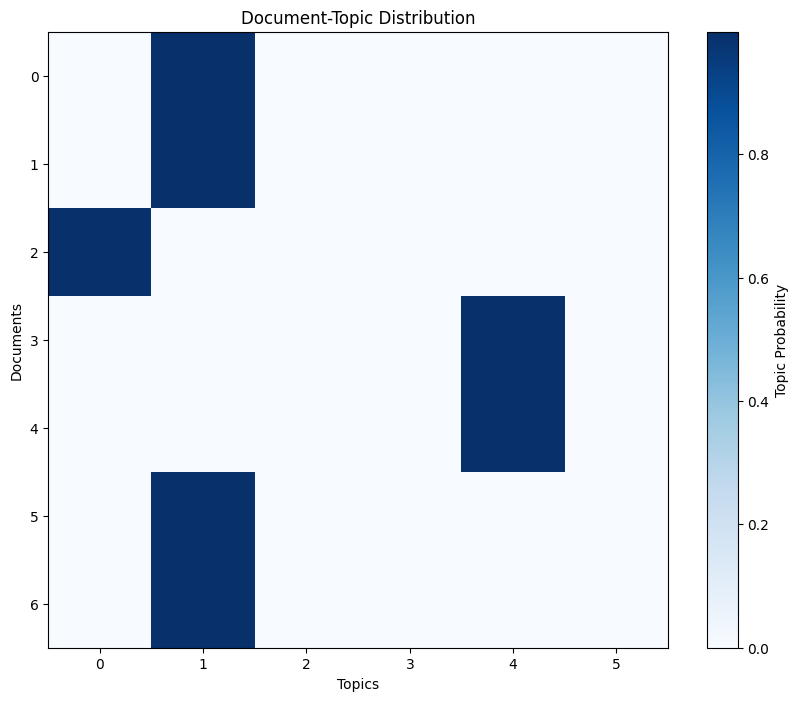

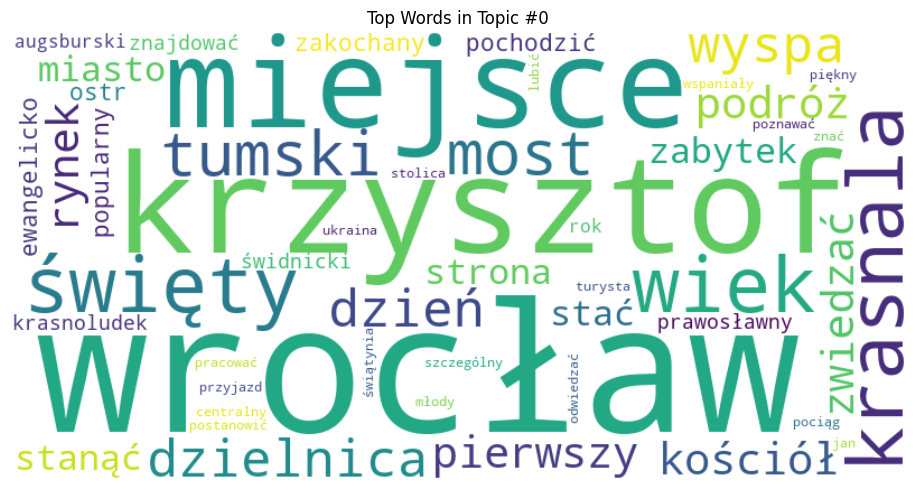

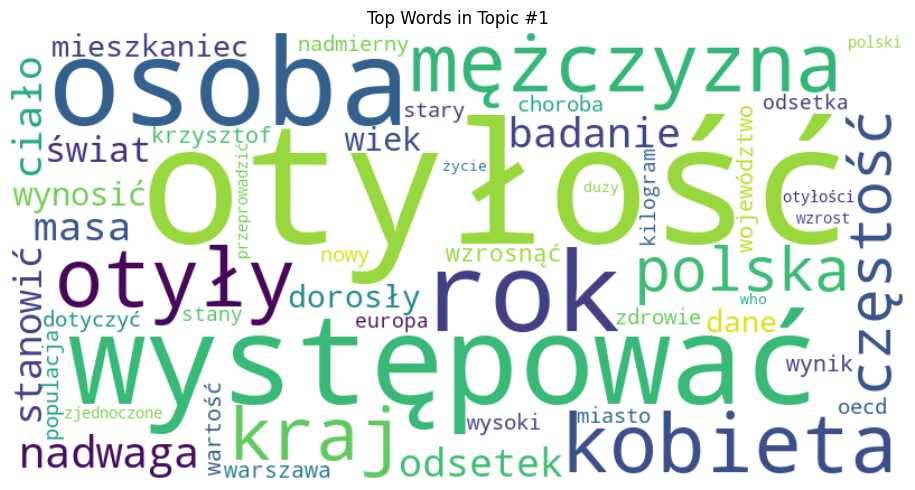

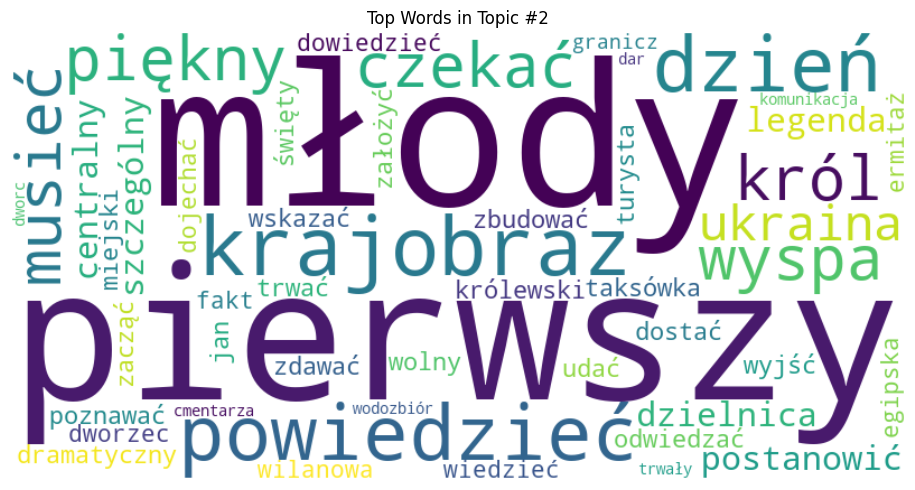

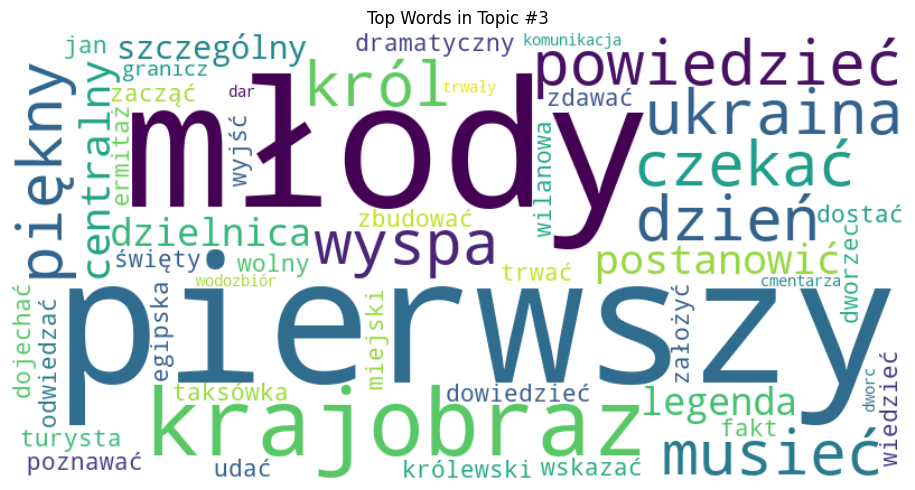

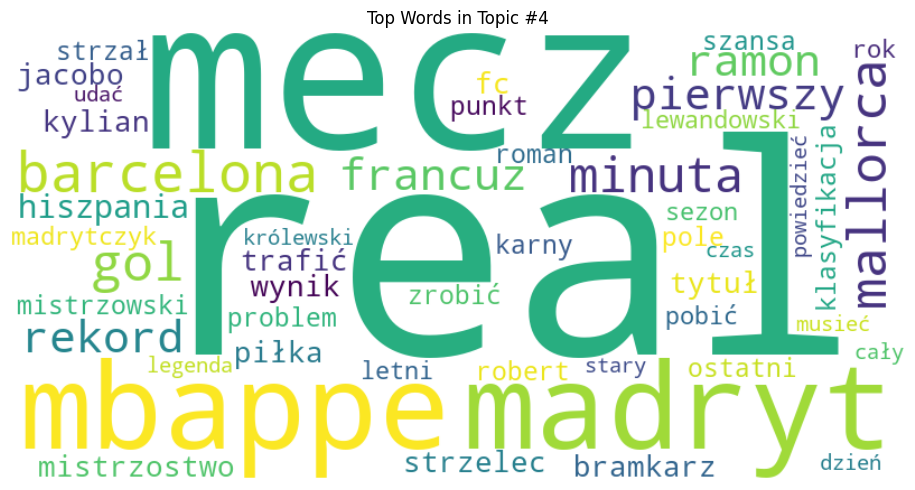

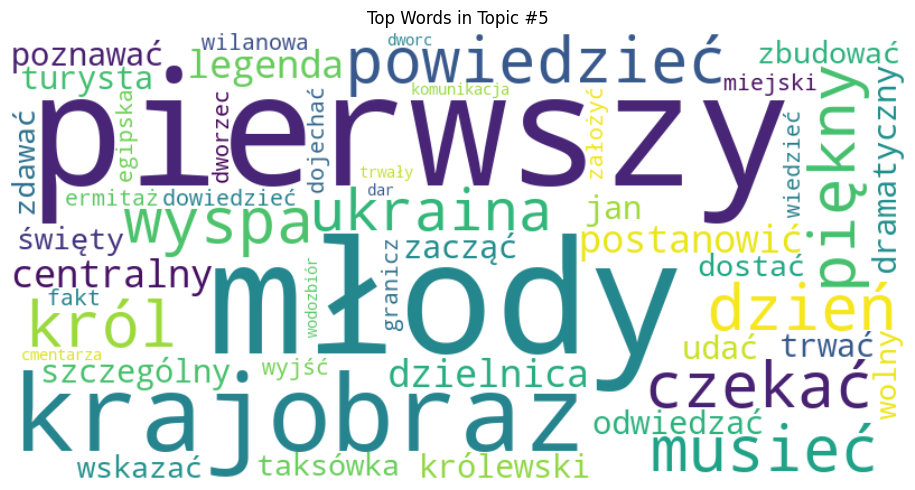

In [18]:
# Alternative visualization approach
import matplotlib.pyplot as plt
import numpy as np

# 1. Print the topics
print("Topics found by LDA:")
for topic_id, topic in lda_model.print_topics():
    print(f"Topic #{topic_id}: {topic}")

# 2. Create a simple visualization of document-topic distribution
doc_topics = [lda_model.get_document_topics(doc) for doc in dtm]

# Create a matrix with document-topic distribution
topic_matrix = np.zeros((len(doc_topics), num_topics))
for i, doc in enumerate(doc_topics):
    for topic_id, prob in doc:
        topic_matrix[i, topic_id] = prob

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(topic_matrix, cmap='Blues', aspect='auto')
plt.colorbar(label='Topic Probability')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.title('Document-Topic Distribution')
plt.savefig('./results/topic_distribution.png')
plt.show()

# 3. Create word clouds for each topic
from wordcloud import WordCloud

for topic_id in range(num_topics):
    # Get the top words for this topic
    word_dict = dict(lda_model.show_topic(topic_id, topn=50))
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        contour_width=3,
        contour_color='steelblue'
    ).generate_from_frequencies(word_dict)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top Words in Topic #{topic_id}')
    plt.tight_layout()
    plt.savefig(f'./results/topic_{topic_id}_wordcloud.png')
    plt.show()